In [9]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [10]:
# load news data
news = pd.read_csv("../data/news/raw_analyst_ratings.csv")
news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [11]:
# load stock data for apple
apple=pd.read_csv("../data/finance/AAPL.csv")
apple.head()

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [13]:
# Function to calculate sentiment polarity (-1 to 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news["Sentiment"] = news["headline"].apply(get_sentiment)

In [14]:
# Calculate daily average sentiment
apple["Daily_Return"] = apple["Close"].pct_change()
apple = apple[1:] 

In [15]:
# Aggregate sentiment by date
daily_sentiment = news.groupby("date")["Sentiment"].mean()

In [16]:
merged_df = pd.merge(
    apple,
    daily_sentiment,
    left_index=True,
    right_index=True,
    how="inner"
)

print(merged_df.head())

Empty DataFrame
Columns: [Date, Close, High, Low, Open, Volume, Daily_Return, Sentiment]
Index: []


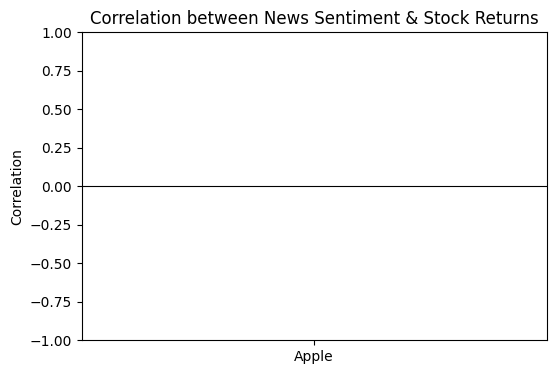

In [17]:
# Calculate correlation
correlation = merged_df["Daily_Return"].corr(merged_df["Sentiment"])

# Plot as a bar
plt.figure(figsize=(6,4))
plt.bar("Apple", correlation, color="skyblue")
plt.ylim(-1, 1)
plt.ylabel("Correlation")
plt.title("Correlation between News Sentiment & Stock Returns")
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

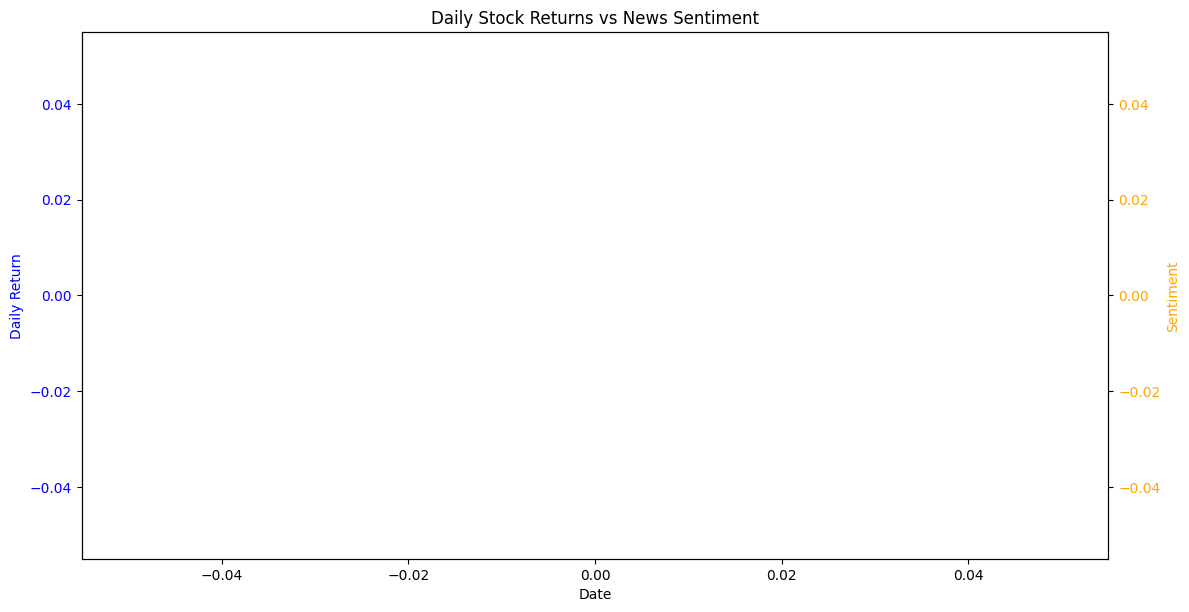

In [18]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Return", color="blue")
ax1.plot(merged_df.index, merged_df["Daily_Return"], color="blue", label="Daily Return")
ax1.tick_params(axis="y", labelcolor="blue")
ax2 = ax1.twinx()
ax2.set_ylabel("Sentiment", color="orange")
ax2.plot(merged_df.index, merged_df["Sentiment"], color="orange", label="Sentiment")
ax2.tick_params(axis="y", labelcolor="orange")
fig.tight_layout()
plt.title("Daily Stock Returns vs News Sentiment")
plt.show()